# Portfolio Analysis of Information technology sector

### Stocks under observation:

    - Activision Blizzard (NYSE:ATVI)
    - Tencent Holdings (NYSE:TCEHY)
    - Take-Two Interactive (NYSE:TTWO)
    - Electronic Arts (NYSE:EA)
    - Huya (NYSE:HUYA)
    - Nintendo Co. Ltd. (NYSE:NTDOY)


In [57]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [58]:
info_tech = ['ATVI', 'TCEHY', 'TTWO', 'EA','HUYA', 'NTDOY' ]
data = pd.DataFrame()
for i in range(len(info_tech)):
    
    df = wb.DataReader(info_tech[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = info_tech[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AAPL,ADBE,CRM,CSCO,IBM,MSFT
Date,,,,,,
2020-01-02,298.829956,334.429993,166.990005,47.965229,132.246933,160.182480
2020-01-03,295.924713,331.809998,166.169998,47.182652,131.192245,158.187927
2020-01-06,298.282715,333.709991,173.449997,47.351055,130.957886,158.596817
2020-01-07,296.879883,333.390015,176.000000,47.043968,131.045761,157.150772
2020-01-08,301.655548,337.869995,177.330002,47.073685,132.139526,159.653915


Text(0, 0.5, 'price in $')

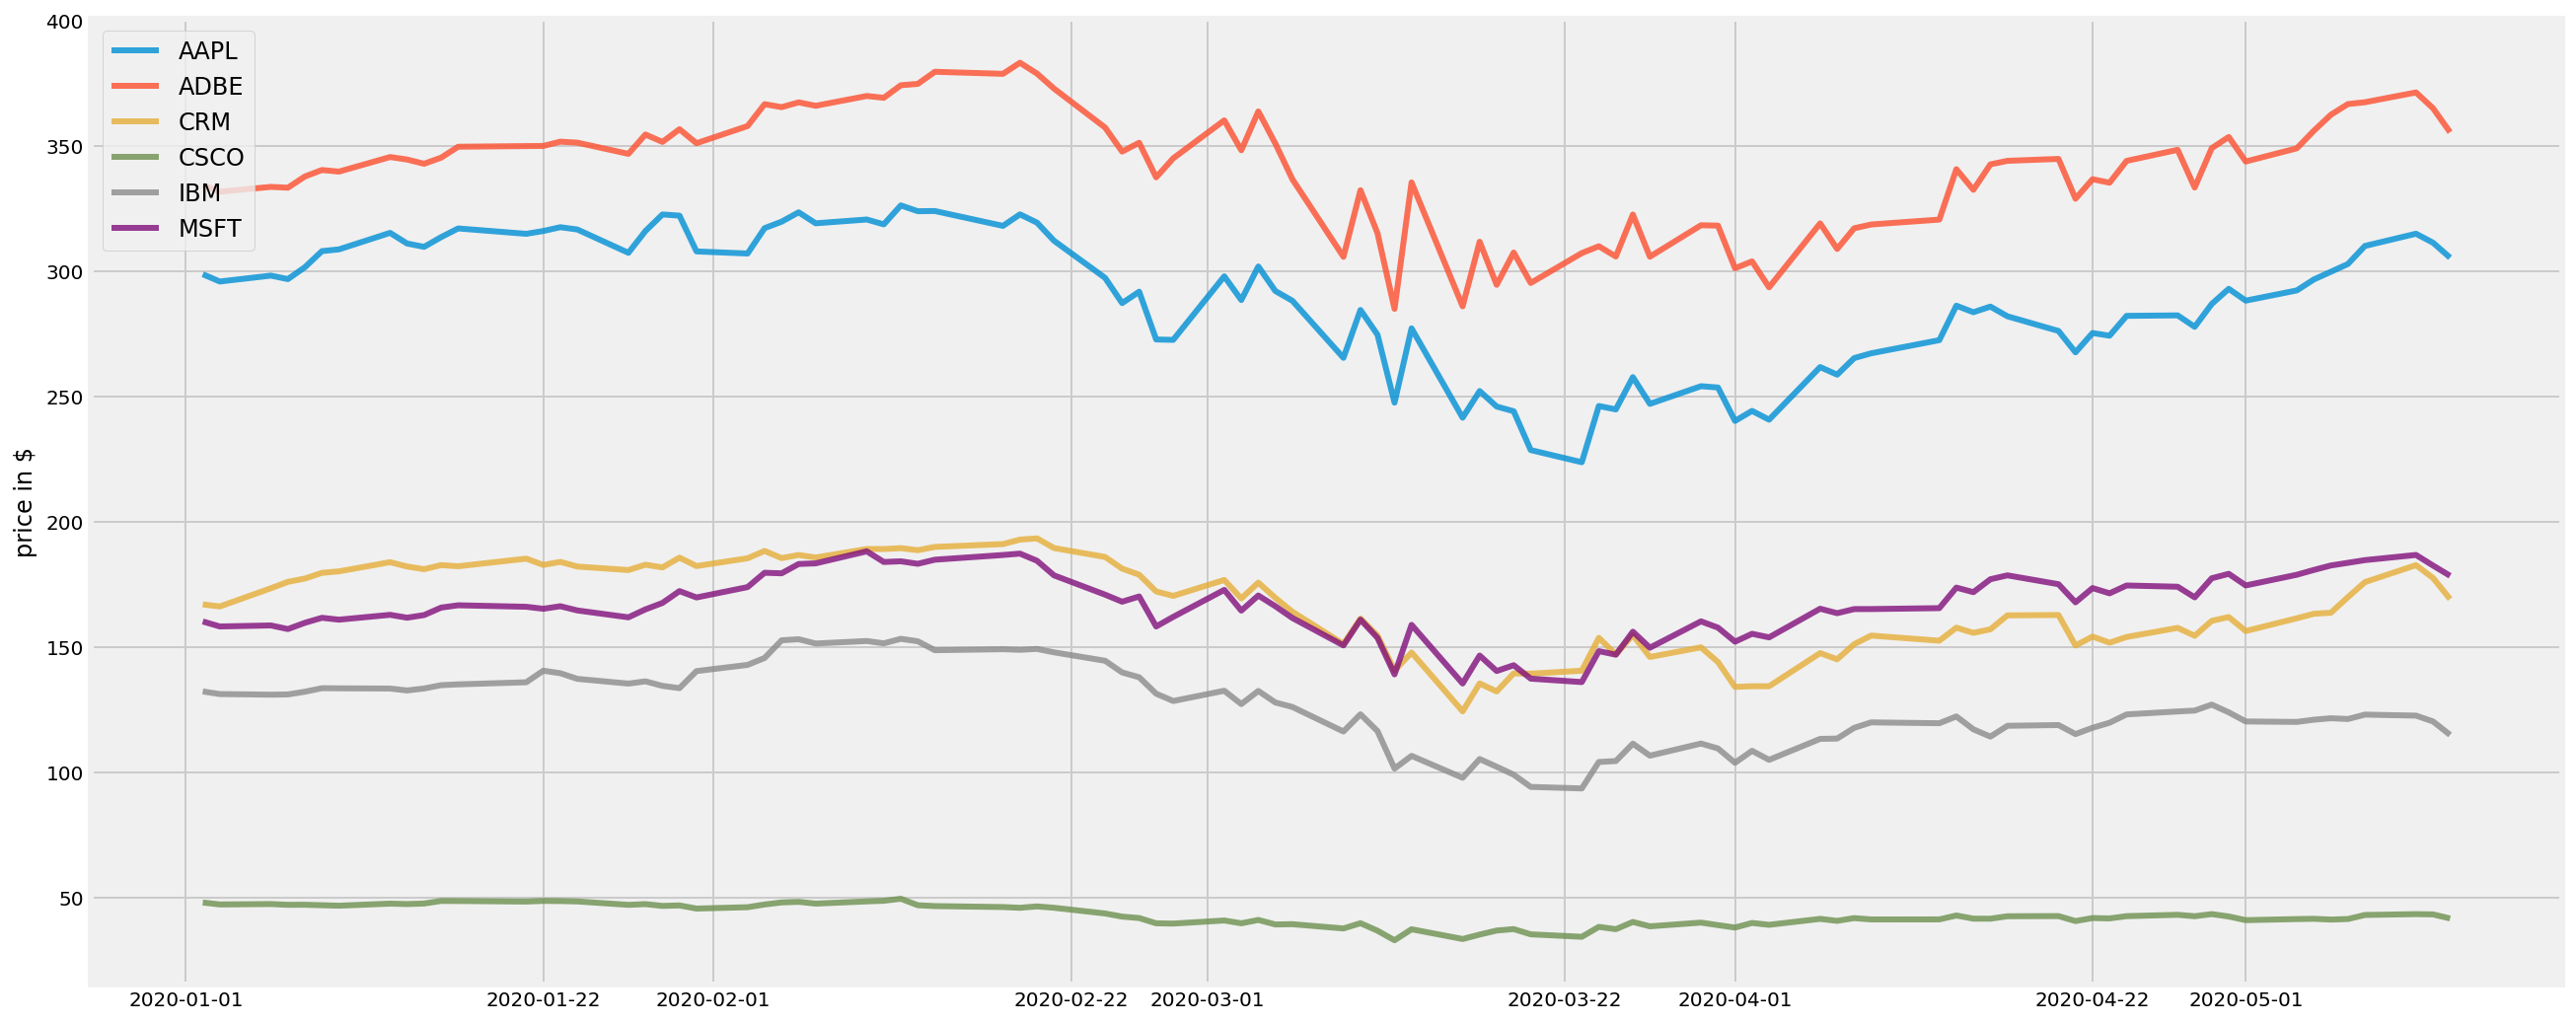

In [59]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

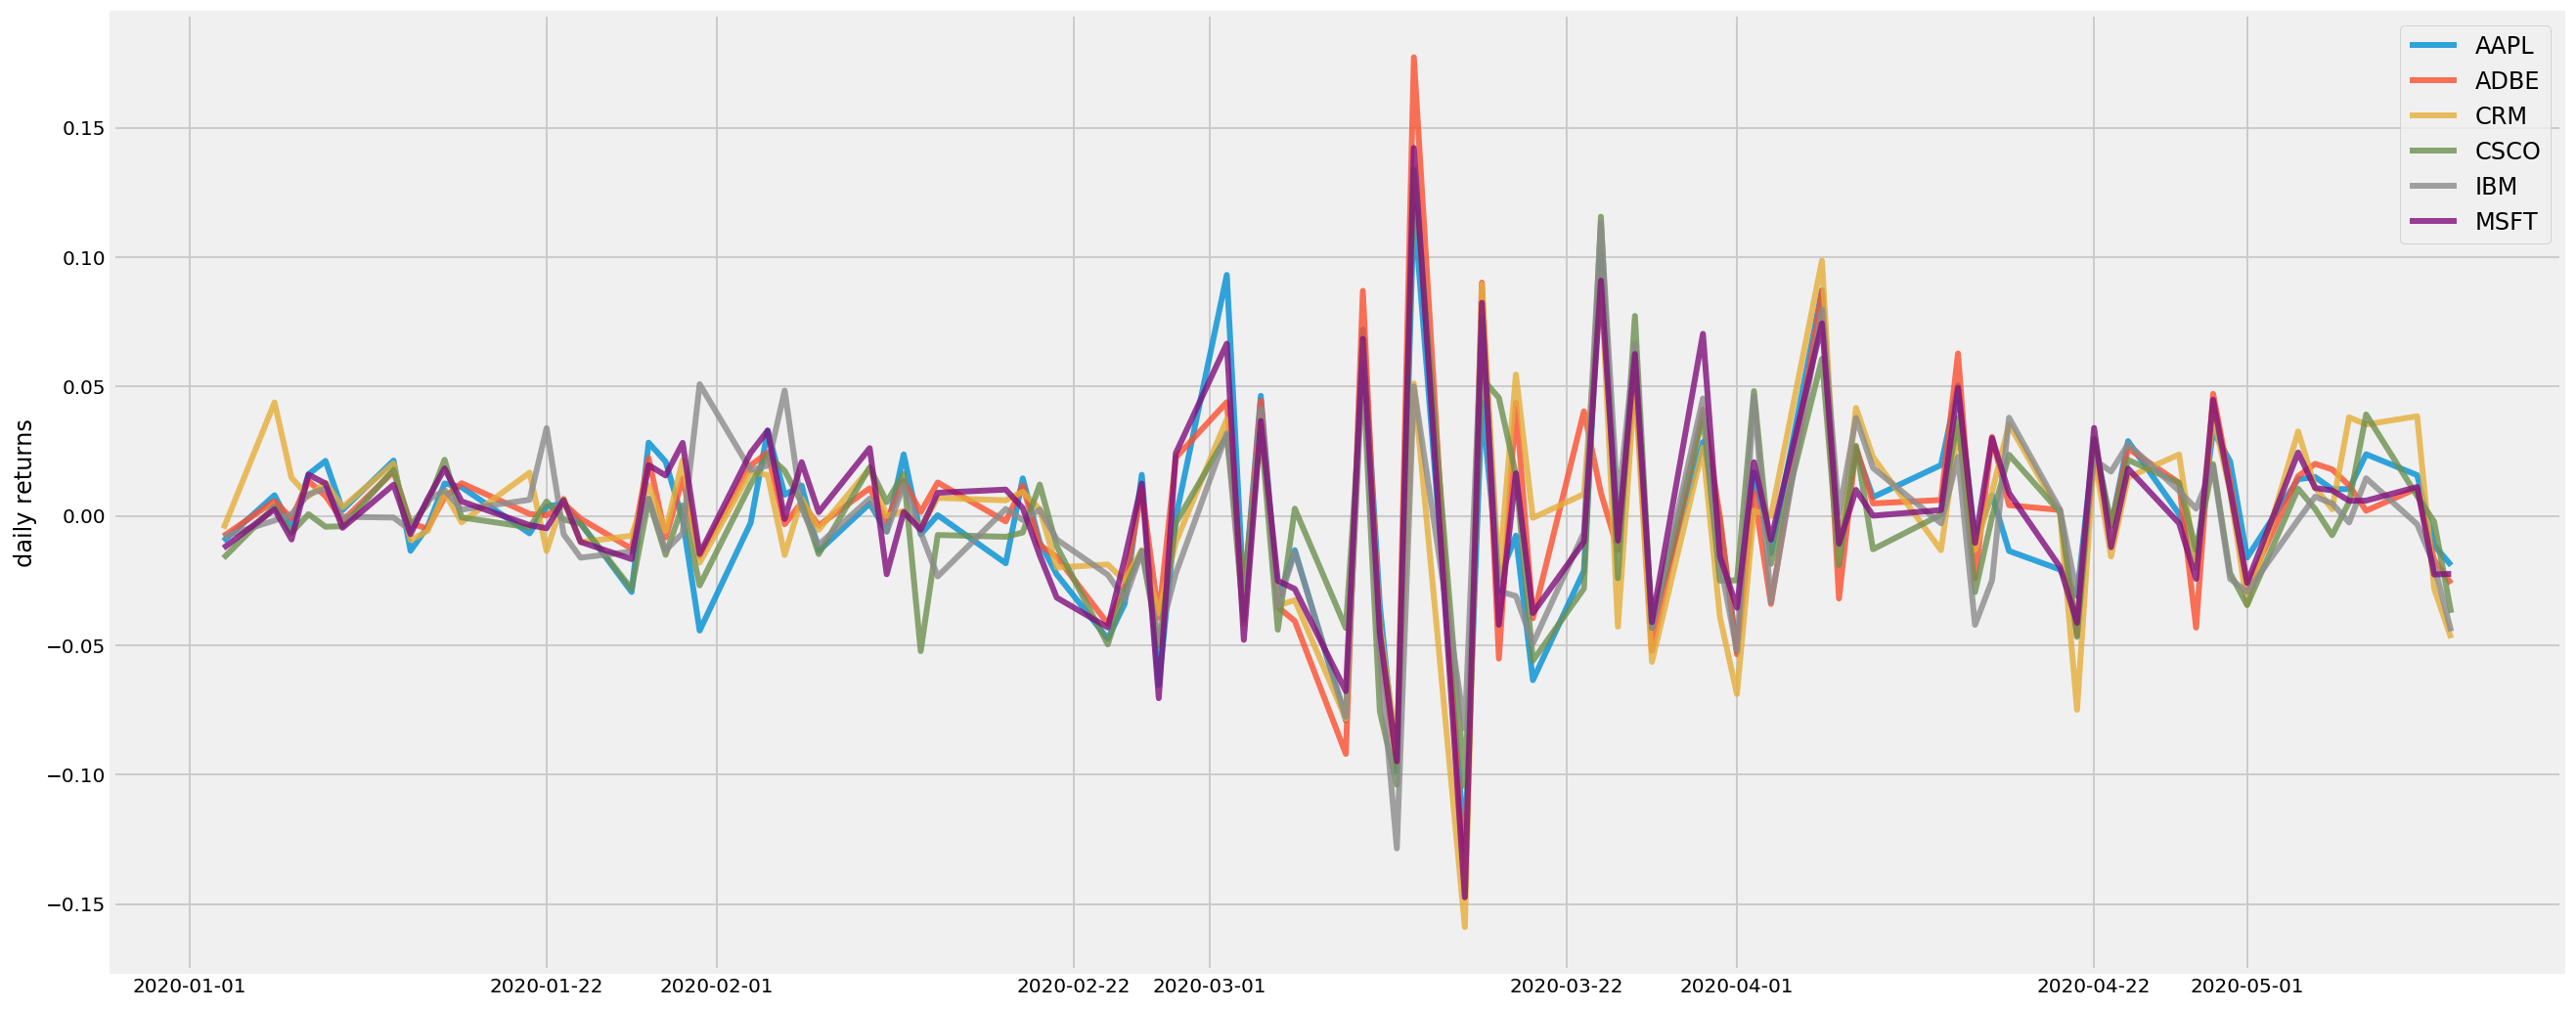

In [60]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

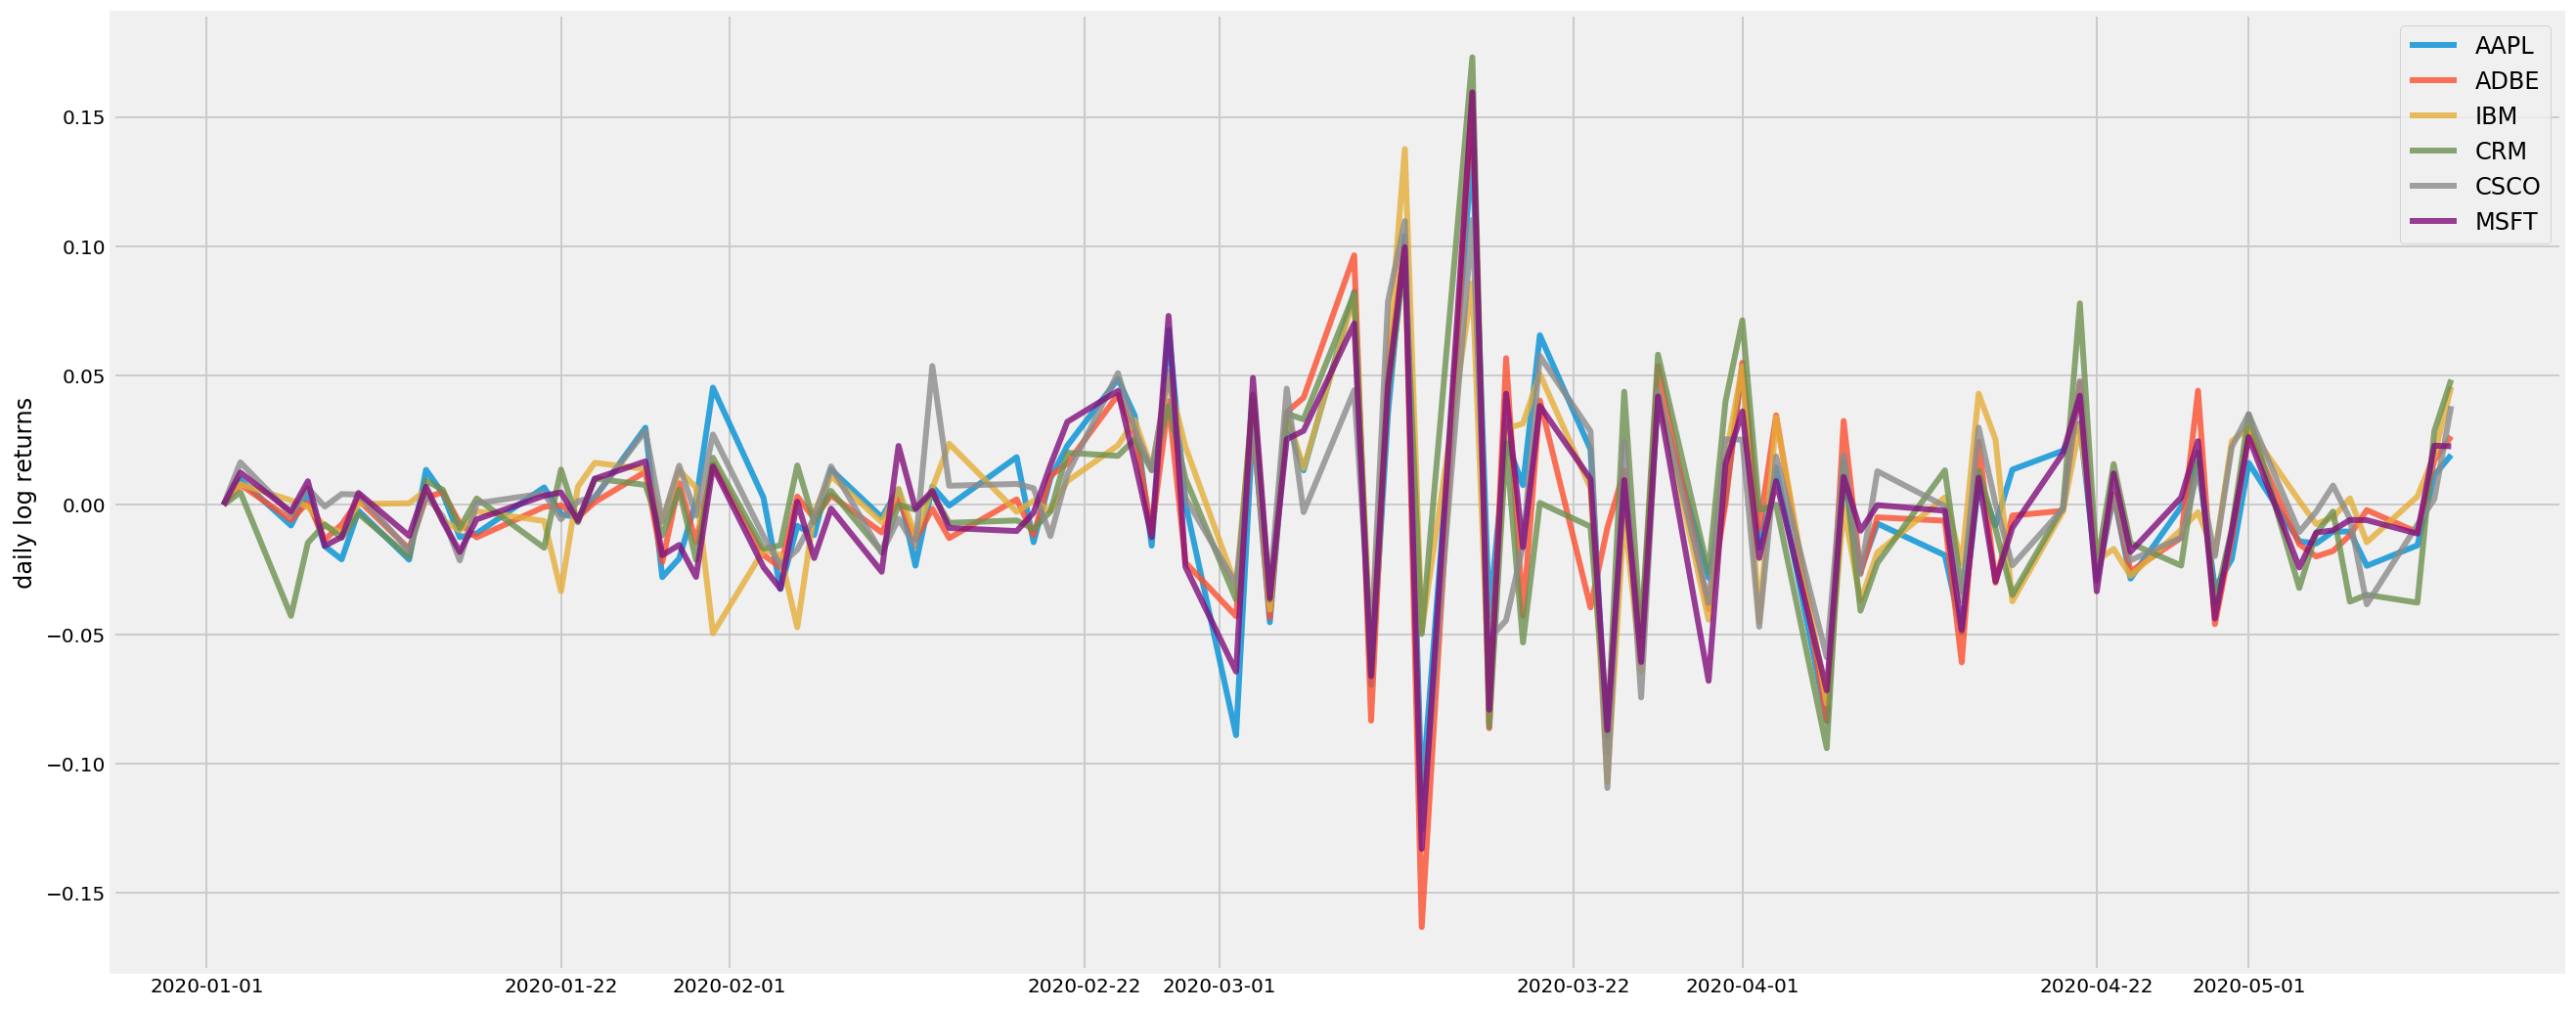

In [61]:
log = pd.DataFrame(columns = info_tech, index = table.index)

for i in range(len(info_tech)):
    log_list = []
    for j in range(len(table[info_tech[i]])):
        if(j+1<len(table[info_tech[i]])):
            log_returns =  np.log(table[info_tech[i]][j]) - np.log(table[info_tech[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[info_tech[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

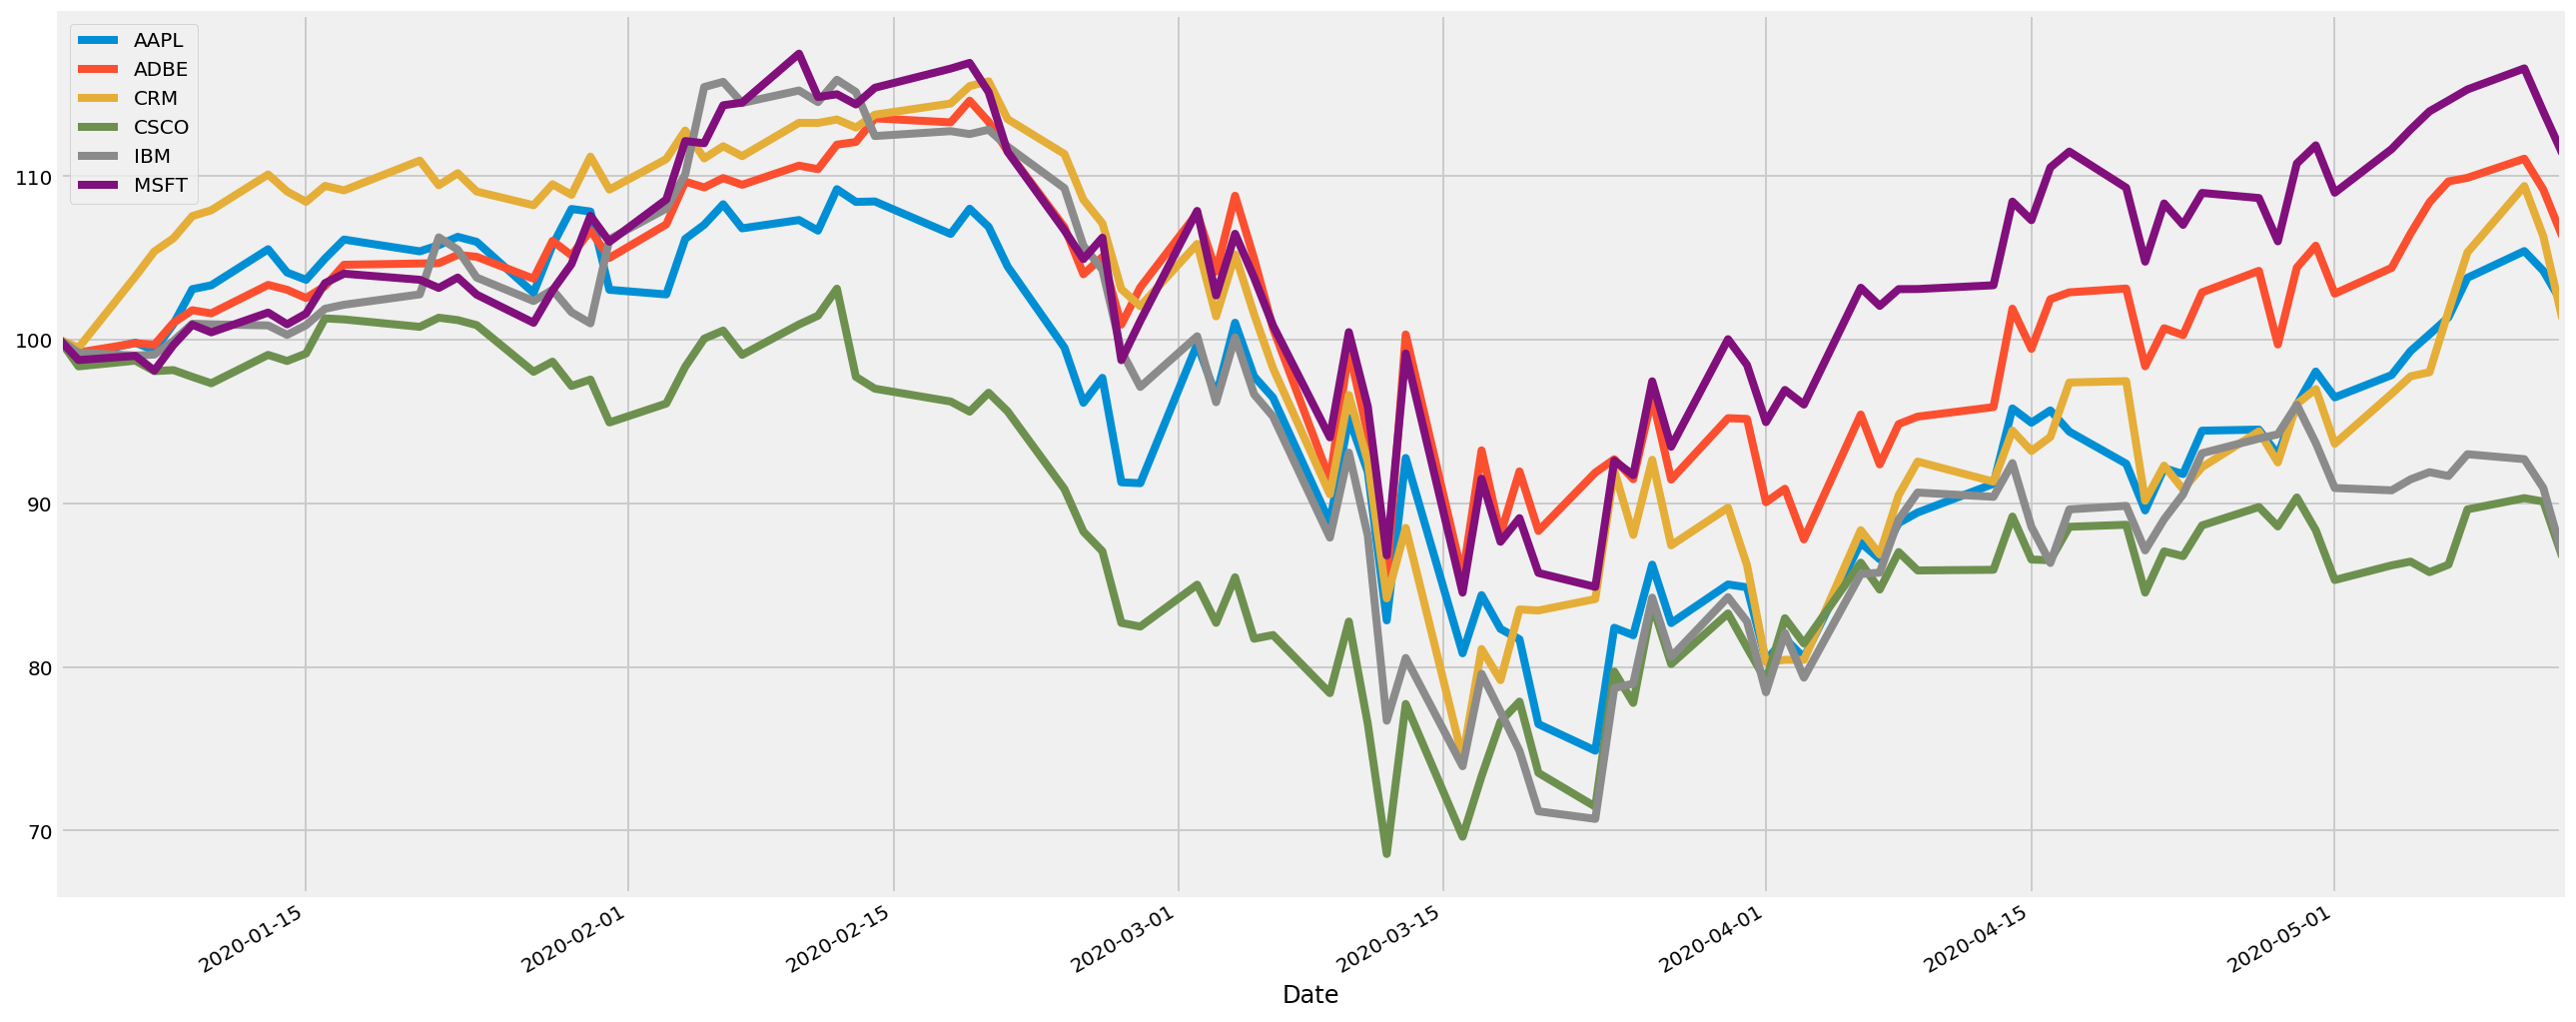

In [62]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [64]:
log.mean()*252

AAPL   -0.060014
ADBE   -0.167663
IBM     0.385265
CRM    -0.035250
CSCO    0.389980
MSFT   -0.295351
dtype: float64

In [65]:
log.std()*252**0.5

AAPL    0.596525
ADBE    0.645318
IBM     0.565742
CRM     0.616587
CSCO    0.579968
MSFT    0.617412
dtype: float64